# Задание 2.1 - Нейронные сети

В этом задании вы реализуете и натренируете настоящую нейроную сеть своими руками!

В некотором смысле это будет расширением прошлого задания - нам нужно просто составить несколько линейных классификаторов вместе!

<img src="https://i.redd.it/n9fgba8b0qr01.png" alt="Stack_more_layers" width="400px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

# Загружаем данные

И разделяем их на training и validation.

In [3]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

# Как всегда, начинаем с кирпичиков

Мы будем реализовывать необходимые нам слои по очереди. Каждый слой должен реализовать:
- прямой проход (forward pass), который генерирует выход слоя по входу и запоминает необходимые данные
- обратный проход (backward pass), который получает градиент по выходу слоя и вычисляет градиент по входу и по параметрам

Начнем с ReLU, у которого параметров нет.

In [4]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2,3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradients are equal at (0, 0). Analytic: 1.61599, Numeric: 1.61599
Gradients are equal at (0, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (0, 2). Analytic: 2.76253, Numeric: 2.76253
Gradients are equal at (1, 0). Analytic: -0.00000, Numeric: 0.00000
Gradients are equal at (1, 1). Analytic: -0.50603, Numeric: -0.50603
Gradients are equal at (1, 2). Analytic: -0.94303, Numeric: -0.94303
Gradient check passed!


А теперь реализуем полносвязный слой (fully connected layer), у которого будет два массива параметров: W (weights) и B (bias).

Все параметры наши слои будут использовать для параметров специальный класс `Param`, в котором будут храниться значения параметров и градиенты этих параметров, вычисляемые во время обратного прохода.

Это даст возможность аккумулировать (суммировать) градиенты из разных частей функции потерь, например, из cross-entropy loss и regularization loss.

In [5]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradients are equal at (0, 0). Analytic: 0.00042, Numeric: 0.00042
Gradients are equal at (0, 1). Analytic: 0.00176, Numeric: 0.00176
Gradients are equal at (0, 2). Analytic: -0.00035, Numeric: -0.00035
Gradients are equal at (1, 0). Analytic: 0.00008, Numeric: 0.00008
Gradients are equal at (1, 1). Analytic: -0.00061, Numeric: -0.00061
Gradients are equal at (1, 2). Analytic: -0.00110, Numeric: -0.00110
Gradient check passed!
Gradients are equal at (0, 0). Analytic: -1.67429, Numeric: -1.67429
Gradients are equal at (0, 1). Analytic: 2.15319, Numeric: 2.15319
Gradients are equal at (0, 2). Analytic: -0.15894, Numeric: -0.15894
Gradients are equal at (0, 3). Analytic: -0.56958, Numeric: -0.56958
Gradients are equal at (1, 0). Analytic: 3.34859, Numeric: 3.34859
Gradients are equal at (1, 1). Analytic: -4.30637, Numeric: -4.30637
Gradients are equal at (1, 2). Analytic: 0.31788, Numeric: 0.31788
Gradients are equal at (1, 3). Analytic: 1.13916, Numeric: 1.13916
Gradients are equal at (2

## Создаем нейронную сеть

Теперь мы реализуем простейшую нейронную сеть с двумя полносвязным слоями и нелинейностью ReLU. Реализуйте функцию `compute_loss_and_gradients`, она должна запустить прямой и обратный проход через оба слоя для вычисления градиентов.

Не забудьте реализовать очистку градиентов в начале функции.

In [6]:
# TODO: In model.py, implement compute_loss_and_gradients function
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for (0, 'W')
Gradients are equal at (0, 0). Analytic: 0.00002, Numeric: 0.00002
Gradients are equal at (0, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (0, 2). Analytic: -0.00004, Numeric: -0.00004
Gradients are equal at (1, 0). Analytic: 0.00003, Numeric: 0.00003
Gradients are equal at (1, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (1, 2). Analytic: -0.00001, Numeric: -0.00001
Gradients are equal at (2, 0). Analytic: 0.00007, Numeric: 0.00007
Gradients are equal at (2, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (2, 2). Analytic: 0.00009, Numeric: 0.00009
Gradients are equal at (3, 0). Analytic: 0.00002, Numeric: 0.00002
Gradients are equal at (3, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (3, 2). Analytic: -0.00005, Numeric: -0.00005
Gradients are equal at (4, 0). Analytic: 0.00001, Numeric: 0.00001
Gradients are equal at (4, 1). Analytic: 0.00000, Numeric: 0.00000
Gradients are equal at (4

True

Теперь добавьте к модели регуляризацию - она должна прибавляться к loss и делать свой вклад в градиенты.

In [8]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for (0, 'W')
Gradients are equal at (0, 0). Analytic: 0.01869, Numeric: 0.01869
Gradients are equal at (0, 1). Analytic: 0.01064, Numeric: 0.01064
Gradients are equal at (0, 2). Analytic: 0.01057, Numeric: 0.01057
Gradients are equal at (1, 0). Analytic: 0.00053, Numeric: 0.00053
Gradients are equal at (1, 1). Analytic: 0.02417, Numeric: 0.02417
Gradients are equal at (1, 2). Analytic: -0.02651, Numeric: -0.02651
Gradients are equal at (2, 0). Analytic: -0.02183, Numeric: -0.02183
Gradients are equal at (2, 1). Analytic: 0.02198, Numeric: 0.02198
Gradients are equal at (2, 2). Analytic: -0.00558, Numeric: -0.00558
Gradients are equal at (3, 0). Analytic: -0.01829, Numeric: -0.01829
Gradients are equal at (3, 1). Analytic: 0.01686, Numeric: 0.01686
Gradients are equal at (3, 2). Analytic: 0.01353, Numeric: 0.01353
Gradients are equal at (4, 0). Analytic: -0.03984, Numeric: -0.03984
Gradients are equal at (4, 1). Analytic: 0.01363, Numeric: 0.01363
Gradients are equal a

True

Также реализуем функцию предсказания (вычисления значения) модели на новых данных.

Какое значение точности мы ожидаем увидеть до начала тренировки?

In [11]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 

0.16666666666666666

# Допишем код для процесса тренировки

Если все реализовано корректно, значение функции ошибки должно уменьшаться с каждой эпохой, пусть и медленно. Не беспокойтесь пока про validation accuracy.

In [25]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0.01)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 0.01)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down every epoch, even if it's slow
loss_history, train_history, val_history = trainer.fit()

Loss: 37.654364, Train accuracy: 0.378667, val accuracy: 0.380000
Loss: 33.569993, Train accuracy: 0.523667, val accuracy: 0.519000
Loss: 26.981674, Train accuracy: 0.595111, val accuracy: 0.573000
Loss: 31.414934, Train accuracy: 0.575556, val accuracy: 0.559000
Loss: 25.802785, Train accuracy: 0.662444, val accuracy: 0.630000
Loss: 24.814273, Train accuracy: 0.666000, val accuracy: 0.615000
Loss: 29.597069, Train accuracy: 0.681000, val accuracy: 0.660000
Loss: 24.992171, Train accuracy: 0.729333, val accuracy: 0.675000
Loss: 23.826297, Train accuracy: 0.714111, val accuracy: 0.654000
Loss: 35.802477, Train accuracy: 0.699444, val accuracy: 0.626000
Loss: 30.966206, Train accuracy: 0.745222, val accuracy: 0.685000
Loss: 31.467729, Train accuracy: 0.732222, val accuracy: 0.652000
Loss: 23.843967, Train accuracy: 0.762111, val accuracy: 0.698000
Loss: 17.565227, Train accuracy: 0.772556, val accuracy: 0.709000
Loss: 13.793018, Train accuracy: 0.765333, val accuracy: 0.692000
Loss: 23.2

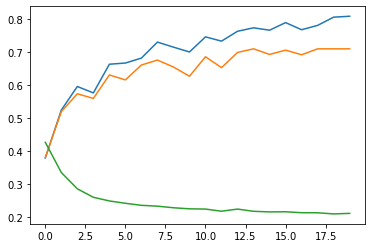

In [29]:
plt.plot(train_history)
plt.plot(val_history)
plt.plot([i/100 for i in loss_history])

# Улучшаем процесс тренировки

Мы реализуем несколько ключевых оптимизаций, необходимых для тренировки современных нейросетей.

## Уменьшение скорости обучения (learning rate decay)

Одна из необходимых оптимизаций во время тренировки нейронных сетей - постепенное уменьшение скорости обучения по мере тренировки.

Один из стандартных методов - уменьшение скорости обучения (learning rate) каждые N эпох на коэффициент d (часто называемый decay). Значения N и d, как всегда, являются гиперпараметрами и должны подбираться на основе эффективности на проверочных данных (validation data). 

В нашем случае N будет равным 1.

In [31]:
# TODO Implement learning rate decay inside Trainer.fit method
# Decay should happen once per epoch

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

Loss: 39.990649, Train accuracy: 0.341000, val accuracy: 0.350000
Loss: 18.362776, Train accuracy: 0.582000, val accuracy: 0.556000
Loss: 33.730156, Train accuracy: 0.603667, val accuracy: 0.598000
Loss: 25.514125, Train accuracy: 0.632667, val accuracy: 0.604000
Loss: 23.463911, Train accuracy: 0.666111, val accuracy: 0.657000
Loss: 15.139167, Train accuracy: 0.723333, val accuracy: 0.674000
Loss: 17.985350, Train accuracy: 0.706778, val accuracy: 0.662000
Loss: 19.589587, Train accuracy: 0.764000, val accuracy: 0.712000
Loss: 19.184644, Train accuracy: 0.784222, val accuracy: 0.711000
Loss: 3.943798, Train accuracy: 0.773556, val accuracy: 0.684000
Loss: 5.344262, Train accuracy: 0.802333, val accuracy: 0.713000
Loss: 7.294439, Train accuracy: 0.810556, val accuracy: 0.725000
Loss: 12.721215, Train accuracy: 0.792667, val accuracy: 0.701000
Loss: 22.406812, Train accuracy: 0.767000, val accuracy: 0.673000
Loss: 14.402038, Train accuracy: 0.800889, val accuracy: 0.714000
Loss: 17.2127

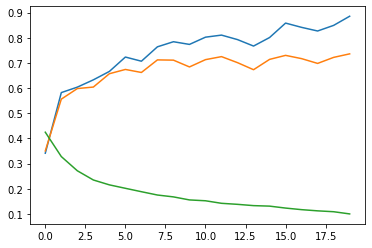

In [32]:
plt.plot(train_history)
plt.plot(val_history)
plt.plot([i/100 for i in loss_history])

# Накопление импульса (Momentum SGD)

Другой большой класс оптимизаций - использование более эффективных методов градиентного спуска. Мы реализуем один из них - накопление импульса (Momentum SGD).

Этот метод хранит скорость движения, использует градиент для ее изменения на каждом шаге, и изменяет веса пропорционально значению скорости.
(Физическая аналогия: Вместо скорости градиенты теперь будут задавать ускорение, но будет присутствовать сила трения.)

```
velocity = momentum * velocity - learning_rate * gradient 
w = w + velocity
```

`momentum` здесь коэффициент затухания, который тоже является гиперпараметром (к счастью, для него часто есть хорошее значение по умолчанию, типичный диапазон -- 0.8-0.99).

Несколько полезных ссылок, где метод разбирается более подробно:  
http://cs231n.github.io/neural-networks-3/#sgd  
https://distill.pub/2017/momentum/

In [35]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

Loss: 43.868194, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 48.333416, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 44.578404, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 43.997389, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 43.172305, Train accuracy: 0.206444, val accuracy: 0.216000
Loss: 39.064467, Train accuracy: 0.246556, val accuracy: 0.252000
Loss: 41.632203, Train accuracy: 0.275556, val accuracy: 0.277000
Loss: 43.897153, Train accuracy: 0.291333, val accuracy: 0.296000
Loss: 40.768938, Train accuracy: 0.345111, val accuracy: 0.342000
Loss: 42.229742, Train accuracy: 0.392222, val accuracy: 0.384000
Loss: 30.936821, Train accuracy: 0.438111, val accuracy: 0.432000
Loss: 32.457166, Train accuracy: 0.468778, val accuracy: 0.458000
Loss: 31.429011, Train accuracy: 0.486889, val accuracy: 0.469000
Loss: 22.498688, Train accuracy: 0.522333, val accuracy: 0.525000
Loss: 30.397985, Train accuracy: 0.548333, val accuracy: 0.550000
Loss: 26.4

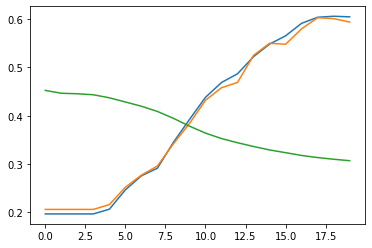

In [36]:
plt.plot(train_history)
plt.plot(val_history)
plt.plot([i/100 for i in loss_history])

Loss: 44.654211, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 43.461579, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 43.084257, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 40.683806, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 45.106943, Train accuracy: 0.212444, val accuracy: 0.220000
Loss: 44.030051, Train accuracy: 0.258778, val accuracy: 0.257000
Loss: 42.382364, Train accuracy: 0.284444, val accuracy: 0.289000
Loss: 41.880947, Train accuracy: 0.337333, val accuracy: 0.346000
Loss: 41.856138, Train accuracy: 0.398556, val accuracy: 0.397000
Loss: 27.324014, Train accuracy: 0.440889, val accuracy: 0.436000
Loss: 30.794974, Train accuracy: 0.465889, val accuracy: 0.456000
Loss: 39.151664, Train accuracy: 0.505222, val accuracy: 0.490000
Loss: 31.304853, Train accuracy: 0.547444, val accuracy: 0.555000
Loss: 33.006183, Train accuracy: 0.589556, val accuracy: 0.571000
Loss: 36.189555, Train accuracy: 0.605000, val accuracy: 0.590000
Loss: 23.9

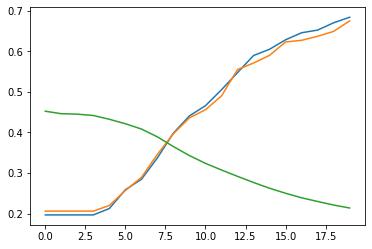

In [37]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

plt.plot(train_history)
plt.plot(val_history)
plt.plot([i/100 for i in loss_history])

# Ну что, давайте уже тренировать сеть!

## Последний тест - переобучимся (overfit) на маленьком наборе данных

Хороший способ проверить, все ли реализовано корректно - переобучить сеть на маленьком наборе данных.  
Наша модель обладает достаточной мощностью, чтобы приблизить маленький набор данных идеально, поэтому мы ожидаем, что на нем мы быстро дойдем до 100% точности на тренировочном наборе. 

Если этого не происходит, то где-то была допущена ошибка!

In [42]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-2, num_epochs=150, batch_size=5)

# You should expect this to reach 1.0 training accuracy 
loss_history, train_history, val_history = trainer.fit()

Loss: 11.522005, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.486851, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.495389, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.441239, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 11.487638, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 11.448196, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 11.502040, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.335039, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.292483, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.397117, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.279881, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.261217, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.184750, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.274145, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 10.521500, Train accuracy: 0.266667, val accuracy: 0.000000
Loss: 11.2

In [44]:
data_size = 15
model = TwoLayerNet(n_input=train_X.shape[1], n_output=10, hidden_layer_size=100, reg=1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=1000, batch_size=5)

# You should expect this to reach 1.0 training accuracy
loss_history, train_history, val_history = trainer.fit()

Loss: 11.656005, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 11.762144, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.866571, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 10.267035, Train accuracy: 0.133333, val accuracy: 0.000000
Loss: 9.694025, Train accuracy: 0.333333, val accuracy: 0.066667
Loss: 27.574786, Train accuracy: 0.133333, val accuracy: 0.333333
Loss: 60.904229, Train accuracy: 0.133333, val accuracy: 0.066667
Loss: 549.473735, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: inf, Train accuracy: 0.333333, val accuracy: 0.133333
Loss: inf, Train accuracy: 0.133333, val accuracy: 0.200000
Loss: inf, Train accuracy: 0.333333, val accuracy: 0.133333
Loss: inf, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: inf, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: inf, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: inf, Train accuracy: 0.266667, val accuracy: 0.133333
Loss: inf, Train accuracy: 0.000000, val accuracy: 0

Теперь найдем гипепараметры, для которых этот процесс сходится быстрее.
Если все реализовано корректно, то существуют параметры, при которых процесс сходится в **20** эпох или еще быстрее.
Найдите их!

In [52]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=0.01, num_epochs=20, batch_size=5)

loss_history, train_history, val_history = trainer.fit()

Loss: 11.544669, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.445405, Train accuracy: 0.200000, val accuracy: 0.066667
Loss: 11.595158, Train accuracy: 0.266667, val accuracy: 0.066667
Loss: 10.870538, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 11.492673, Train accuracy: 0.200000, val accuracy: 0.133333
Loss: 10.073317, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 8.358864, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 6.605763, Train accuracy: 0.400000, val accuracy: 0.000000
Loss: 6.915752, Train accuracy: 0.466667, val accuracy: 0.000000
Loss: 9.134007, Train accuracy: 0.400000, val accuracy: 0.133333
Loss: 6.737535, Train accuracy: 0.533333, val accuracy: 0.000000
Loss: 3.753456, Train accuracy: 0.666667, val accuracy: 0.000000
Loss: 6.166012, Train accuracy: 0.666667, val accuracy: 0.000000
Loss: 9.284048, Train accuracy: 0.733333, val accuracy: 0.066667
Loss: 1.618460, Train accuracy: 0.733333, val accuracy: 0.066667
Loss: 2.444776, Tra

# Итак, основное мероприятие!

Натренируйте лучшую нейросеть! Можно добавлять и изменять параметры, менять количество нейронов в слоях сети и как угодно экспериментировать. 

Добейтесь точности лучше **60%** на validation set.

In [53]:
# Let's train the best one-hidden-layer network we can

learning_rates = 1e-4
reg_strength = 1e-3
learning_rate_decay = 0.999
hidden_layer_size = 128
num_epochs = 200
batch_size = 64

best_classifier = None
best_val_accuracy = None

loss_history = []
train_history = []
val_history = []

# TODO find the best hyperparameters to train the network
# Don't hesitate to add new values to the arrays above, perform experiments, use any tricks you want
# You should expect to get to at least 40% of valudation accuracy
# Save loss/train/history of the best classifier to the variables above

print('best validation accuracy achieved: %f' % best_val_accuracy)

TypeError: must be real number, not NoneType

Loss: 45.250286, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 44.402052, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 45.977826, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 42.812815, Train accuracy: 0.196667, val accuracy: 0.206000
Loss: 46.199118, Train accuracy: 0.223333, val accuracy: 0.228000
Loss: 37.873163, Train accuracy: 0.264333, val accuracy: 0.259000
Loss: 40.302453, Train accuracy: 0.304556, val accuracy: 0.305000
Loss: 34.309288, Train accuracy: 0.364111, val accuracy: 0.371000
Loss: 32.817998, Train accuracy: 0.426889, val accuracy: 0.408000
Loss: 27.067647, Train accuracy: 0.465556, val accuracy: 0.453000
Loss: 30.249534, Train accuracy: 0.487333, val accuracy: 0.478000
Loss: 35.157065, Train accuracy: 0.527667, val accuracy: 0.513000
Loss: 22.507565, Train accuracy: 0.564889, val accuracy: 0.553000
Loss: 23.086124, Train accuracy: 0.598667, val accuracy: 0.578000
Loss: 16.386597, Train accuracy: 0.613889, val accuracy: 0.594000
Loss: 29.9

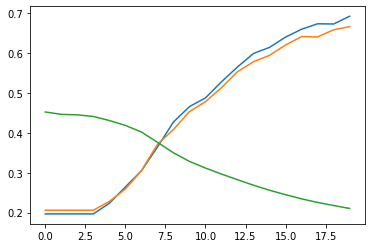

In [54]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 0)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

plt.plot(train_history)
plt.plot(val_history)
plt.plot([i/100 for i in loss_history])

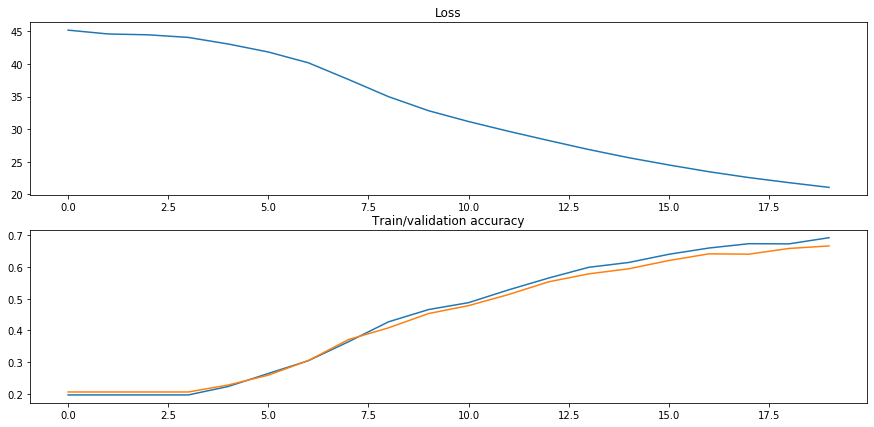

In [55]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.title("Loss")
plt.plot(loss_history)
plt.subplot(212)
plt.title("Train/validation accuracy")
plt.plot(train_history)
plt.plot(val_history)

# Как обычно, посмотрим, как наша лучшая модель работает на тестовых данных

In [57]:
test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.629000
